In [114]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [115]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [36]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [37]:
print(diabetes_dataset['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [116]:
# Step 1

X = diabetes_dataset['data']
df_X = pd.DataFrame(X, columns = diabetes_dataset['feature_names'] )
y = diabetes_dataset['target']
df_y = pd.DataFrame(y)

In [39]:
# Step 2, 3

X2 = pd.DataFrame.to_numpy(df_X)
y2 = pd.DataFrame.to_numpy(df_y)
print(type(X2))
print(type(y2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [117]:
# Step 4

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353, 1)
(89, 10) (89, 1)


In [88]:
# Step 5

W = np.random.rand(10)
W = W.reshape(-1,1) #노드와 다른 점
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    predictions = predictions.reshape(-1,1)
    return predictions

'\nprint(W.shape)\nN = len(y_train)\npredictions = 0\nfor i in range(10):\n     predictions += X_train[:, i] * W[i]\npredictions += b\npredictions = predictions.reshape(-1,1)\ndW = 1/N * 2 * X_train.T.dot(predictions - y_train)\ndb = 2 * (predictions- y_train).mean()\n\nprint(dW.shape)\nW -= 0.0001 * dW\n'

In [90]:
# Step 6

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [91]:
# Step 7

def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [110]:
# Step 8

LEARNING_RATE = 0.2

In [118]:
# Step 9

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 2957.7729
Iteration 200 : Loss 2948.7114
Iteration 300 : Loss 2941.1262
Iteration 400 : Loss 2934.7618
Iteration 500 : Loss 2929.4089
Iteration 600 : Loss 2924.8960
Iteration 700 : Loss 2921.0820
Iteration 800 : Loss 2917.8505
Iteration 900 : Loss 2915.1058
Iteration 1000 : Loss 2912.7684


In [112]:
# Step 10

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2868.284390973325

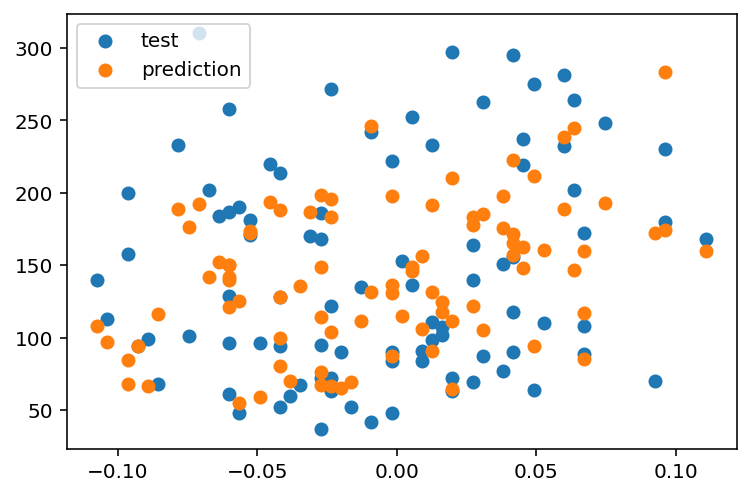

In [120]:
# Step 11

plt.scatter(X_test[:, 0], y_test, label="test")
plt.scatter(X_test[:, 0], prediction, label="prediction")
plt.legend()
plt.show()